## Seleção univariada de recursos
- Vamos **analisar cada uma das features de forma separada**, considerando sua relação com o target através de **testes estatísticos**
- Podemos selecionar os **K recursos de maior pontuação**, um **percentual** dos recursos, considerar a taxa de **falsos positivos / falsos negativos** ou até **criar nossa própria estratégia de seleção**
- **Precisamos** selecionar qual vai ser a função estatística usada e essa função irá retornar uma **pontuação** para cada um dos recursos
    - Métodos baseados no **teste F** vão analisar o **grau de dependência linear** entre duas variáveis aleatórias
        - Regressão: f_regression
        - Classificação: f_classif     
    - Os **métodos de informação mútua** conseguem **analisar qualquer tipo de dependência estatística**, mas **precisam de mais dados** para serem mais precisos. Também trabalham bem com dados esparsos.
        - Regressão: mutual_info_regression
        - Classificação: mutual_info_classif
    - **Metodos quadráticos só podem ser aplicados para valores não negativos**
        - Classificação: chi2 (também é útil para trabalharmos com dados esparsos)
        
 
- **"Aviso Cuidado para não usar uma função de pontuação de regressão com um problema de classificação, pois você obterá resultados inúteis."**

- Começando com o dataset load_wine do scikit-learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
# Importando o dataset load_wine
from sklearn.datasets import load_wine

In [2]:
# Importando X e y
X,y = load_wine(return_X_y=True,as_frame=True)

In [3]:
# Visualizando a base
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [4]:
# Visualizando o número de recursos
X.shape

(178, 13)

### SelectKBest
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [5]:
# Importando o SelectKBest
from sklearn.feature_selection import SelectKBest

In [6]:
# Criando o nosso seletor
seletor = SelectKBest(k=5)

In [7]:
# Fazendo o fit com os dados
seletor = seletor.fit(X,y)

In [8]:
# Visualizando os scores
seletor.scores_

array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])

In [9]:
# Visualizando as colunas
seletor.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

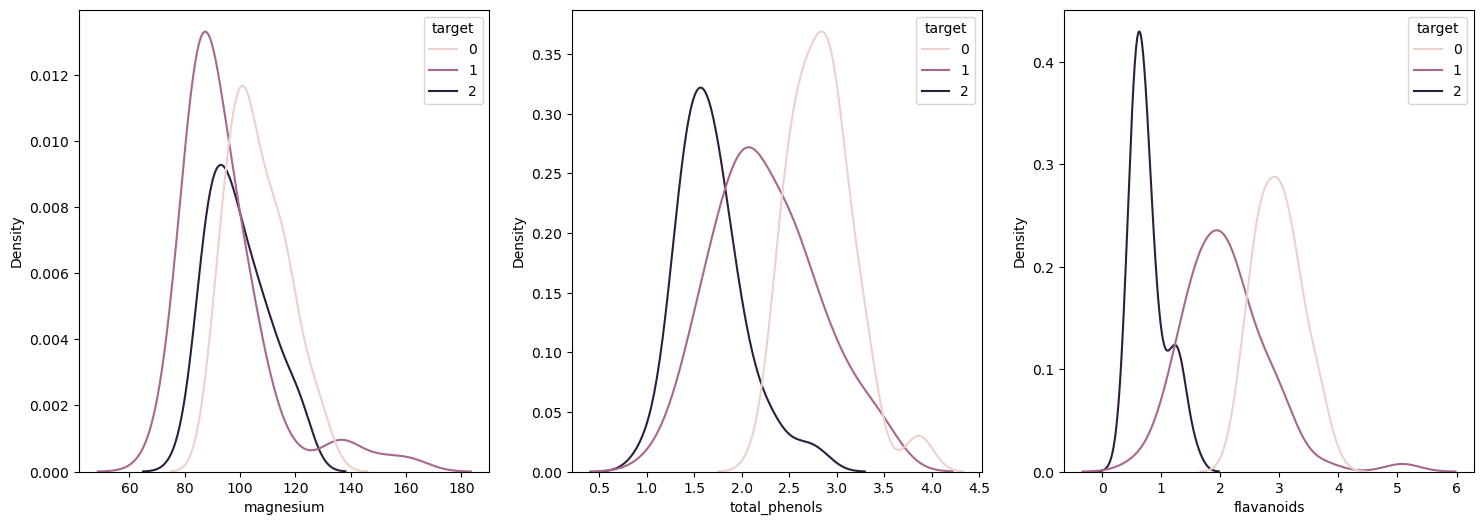

In [10]:
# Visualizando graficamente a distribuição dos dados
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3,figsize=(18,6))

sns.kdeplot(X.magnesium,hue=y,ax=ax[0])
sns.kdeplot(X.total_phenols,hue=y,ax=ax[1])
sns.kdeplot(X.flavanoids,hue=y,ax=ax[2])

plt.show()

In [11]:
# Visualizando os valores gerados
seletor.get_feature_names_out()

array(['alcohol', 'flavanoids', 'color_intensity',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

- **Selecionando o KBest para o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [12]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [13]:
# Importando X e y
X_iris,y_iris = load_iris(return_X_y=True,as_frame=True)

In [14]:
# Visualizando a base
X_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [15]:
# Criando o nosso seletor
from sklearn.feature_selection import SelectKBest
seletor = SelectKBest(k=2)

In [16]:
# Fazendo o fit com os dados
seletor = seletor.fit(X_iris,y_iris)

In [17]:
# Visualizando os scores
seletor.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

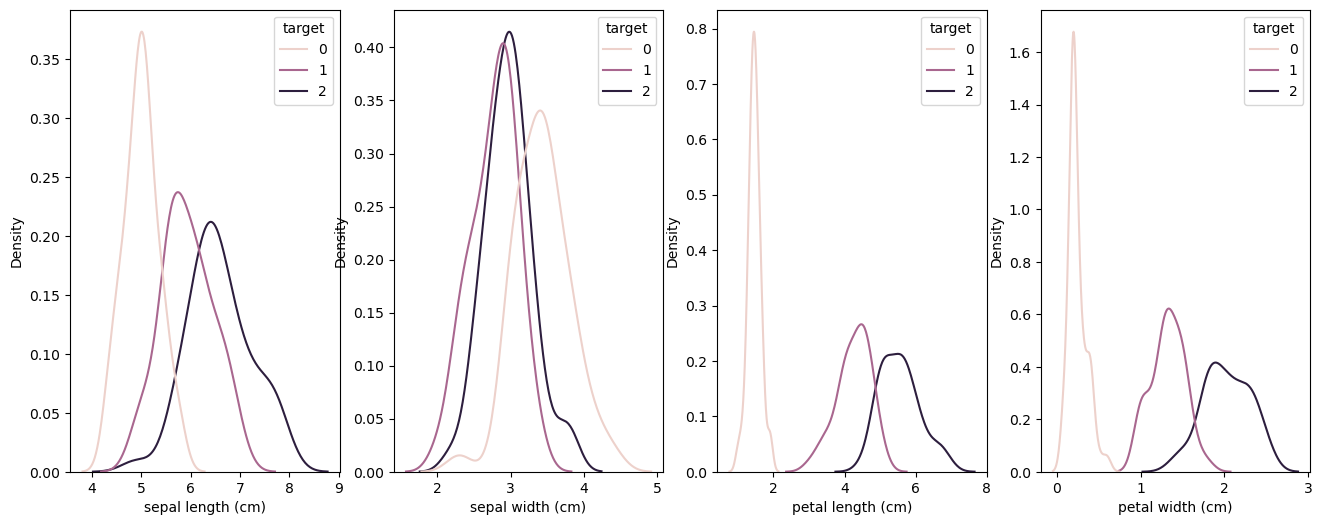

In [18]:
# Visualizando graficamente a distribuição dos dados
fig, ax = plt.subplots(ncols=4,figsize=(16,6))

sns.kdeplot(X_iris.iloc[:,0],hue=y_iris,ax=ax[0])
sns.kdeplot(X_iris.iloc[:,1],hue=y_iris,ax=ax[1])
sns.kdeplot(X_iris.iloc[:,2],hue=y_iris,ax=ax[2])
sns.kdeplot(X_iris.iloc[:,3],hue=y_iris,ax=ax[3])

plt.show()

- **Utilizando o KBest na regressão**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [19]:
# Importando o dataset de casas da califórnia
from sklearn.datasets import fetch_california_housing

In [20]:
# Importando X e y
X_casas,y_casas = fetch_california_housing(return_X_y=True,as_frame=True)

In [21]:
# Visualizando a base
X_casas.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [22]:
# Criando o nosso seletor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
seletor = SelectKBest(mutual_info_regression, k=4)

In [23]:
# Fazendo o fit com os dados
seletor = seletor.fit(X_casas,y_casas)

In [24]:
# Visualizando os scores
seletor.scores_

array([0.38765338, 0.03321488, 0.10316556, 0.02429715, 0.02047571,
       0.07204185, 0.37363104, 0.40126138])

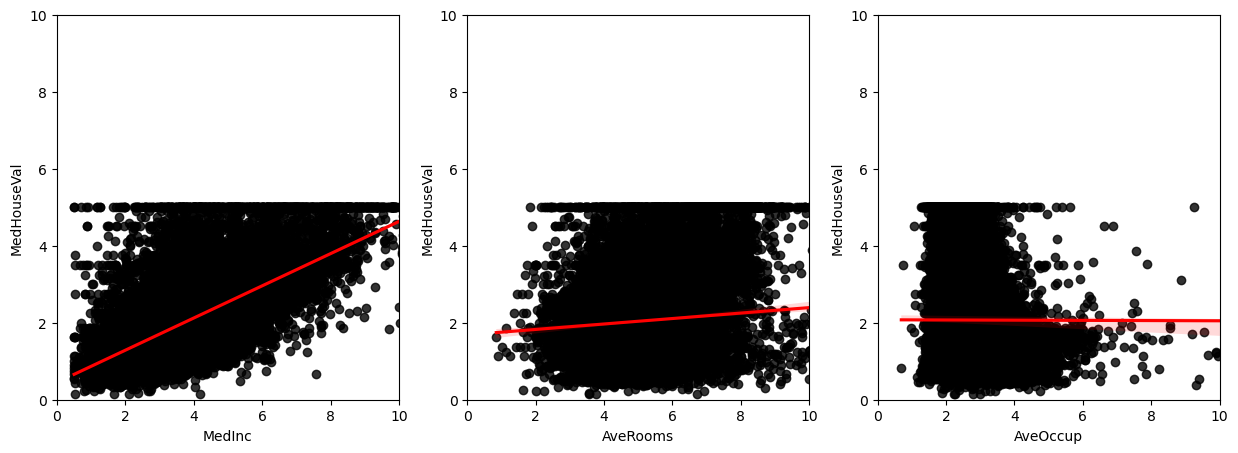

In [25]:
# Visualizando graficamente
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(x=X_casas.iloc[:,0],y=y_casas,scatter_kws={"color": "black"}, line_kws={"color": "red"},
            # ci=None,
            ax=ax[0])
sns.regplot(x=X_casas.iloc[:,2],y=y_casas,scatter_kws={"color": "black"}, line_kws={"color": "red"},
            # ci=None,fit_reg=False,
            ax=ax[1])
sns.regplot(x=X_casas.iloc[:,5],y=y_casas,scatter_kws={"color": "black"}, line_kws={"color": "red"},
           # ci=None,fit_reg=False,
            ax=ax[2])

ax[0].set(xlim=(0, 10),ylim=(0,10))
ax[1].set(xlim=(0, 10),ylim=(0,10))
ax[2].set(xlim=(0, 10),ylim=(0,10))

plt.show()

- **Agora utilizando um dataset real**
    - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [26]:
# Importando o dataset de cartão de crédito
import pandas as pd
base = pd.read_csv('creditcard.csv')

In [27]:
# Visualizando a base
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [28]:
# Separando X e y
X = base.drop('Class',axis=1)
y = base.Class

In [29]:
# Visualizando os valores de y
y.value_counts()/y.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [30]:
# Visualizando o shape de X
X.shape

(284807, 30)

- Separando em treino e teste
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [31]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [32]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [33]:
# Verificando o y de treino
y_train.value_counts()/y_train.shape[0]

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [34]:
# Verificando o y de teste
y_test.value_counts()/y_test.shape[0]

0    0.998276
1    0.001724
Name: Class, dtype: float64

- Vamos utilizar a **Árvore de Decisão para criar o nosso modelo**
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
    - Obs: é importante considerar que **o melhor conjunto de features vai depender também de todo o modelo que estamos utilizando**
- E o **f1_score para avaliar**
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [35]:
# Criando um seletor para k = 10
from sklearn.feature_selection import SelectKBest
seletor = SelectKBest(k=10)

In [36]:
# Fazendo o fit do seletor
seletor = seletor.fit(X_train,y_train)

In [37]:
# Fazendo o transform
seletor.transform(X_train)

array([[-0.5373172 , -0.91976418, -0.97489855, ...,  1.50600338,
        -0.17825182, -0.97053677],
       [ 1.27452953,  1.34801689, -0.59191994, ...,  0.10043582,
        -0.22043114, -0.00357948],
       [-1.80333274,  0.38520687,  0.0722869 , ...,  0.37203897,
         0.55020954, -0.17005534],
       ...,
       [ 1.58156778, -0.02428591,  0.60921201, ..., -1.87993724,
         1.24154117, -2.62321076],
       [ 0.49654001,  1.50531804,  0.10055102, ..., -0.79691297,
         0.40479457, -1.03306098],
       [ 1.8233943 ,  0.31299051,  0.49935058, ..., -0.9951504 ,
         0.51705177, -1.11336176]])

In [38]:
# Visualizando o novo shape
seletor.transform(X_train).shape

(190820, 10)

In [39]:
# Visualizando as colunas
seletor.get_feature_names_out()

array(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'],
      dtype=object)

- Utilizando esses dados na Árvore de Decisão

In [ ]:
# Importando a Árvore de Decisão

In [ ]:
# Criando o classificador

In [ ]:
# Selecionando o X_train com as colunas selecionadas acima

In [ ]:
# Fazendo o fit do modelo

In [ ]:
# Selecionando o X_test com as mesmas colunas

In [ ]:
# Fazendo a previsão

- E então avaliando com o f1_score

In [ ]:
# Importando o f1_score

In [ ]:
# E calculando

- **Podemos então percorrer diferentes valores de k avaliando o f1_score**

In [ ]:
# Criando o nosso seletor
k = []
f1 = []

for i in range(1,len(X_train.columns)):
    
    # Selecionando as colunas
    
    # Utilizando no modelo
    
    # Avaliando o modelo
    
    # Salvando as informações

In [ ]:
# Visualizando graficamente a relação de f1_score com k
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(k, f1)

plt.show()